# Try for test case 01 using globcurrent data

## 14 days

## adapted from test05 of GlobCurrent

In [1]:
!ncdump -h /Users/Gomez023/Downloads/dataset-uv-rep-hourly_1624265349481.nc

netcdf dataset-uv-rep-hourly_1624265349481 {
dimensions:
	time = 33 ;
	depth = 1 ;
	latitude = 720 ;
	longitude = 1440 ;
variables:
	float vo(time, depth, latitude, longitude) ;
		vo:standard_name = "northward_sea_water_velocity" ;
		vo:grid_mapping = "crs" ;
		vo:_FillValue = 1.844674e+19f ;
		vo:units = "m/s" ;
		vo:long_name = "Absolute geostrophic velocity + depth Ekman velocity: meridian component" ;
		vo:coordinates = "time depth latitude longitude " ;
	float time(time) ;
		time:units = "hours since 1950-01-01 00:00:00 UTC" ;
		time:long_name = "Time" ;
		time:standard_name = "time" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
		time:_CoordinateAxisType = "Time" ;
	short depth(depth) ;
		depth:standard_name = "depth" ;
		depth:long_name = "Depth" ;
		depth:units = "m" ;
		depth:axis = "Z" ;
		depth:positive = "down" ;
		depth:_CoordinateAxisType = "Height" ;
		depth:_CoordinateZisPositive = "down" ;
	float latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		la

In [1]:
#%matplotlib inline
import numpy as np
from datetime import timedelta, datetime

In [2]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import num2date, date2num
import pandas as pd

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import colors 

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter#
import matplotlib.ticker as mticker


In [4]:
!ls

20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_00m_continuous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_00m_instantaneous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_15m_continuous-v1.0-fv1.0.nc
20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_15m_instantaneous-v1.0-fv1.0.nc
20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_00m_drifters_180days-v1.0-fv1.0.nc
20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_15m_V3_drifters_180days-v1.0-fv1.0.nc
20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_15m_drifters_180days-v1.0-fv1.0.nc
2021-06-19_Oil_depth00m_strating20110910_checking_STUCK.ipynb
2021-06-20_Oil_depth00m-15m_starting20110910_ANIM.ipynb
2021-06-20_Oil_depth00m-15m_starting20110910_repeatDT_ANIM.ipynb
2021-06-20_Sargassum_depth00m-15m_MESH_ANIM.ipynb
2021-06-20_Sargassum_depth00m-15m_drifters.ipynb
CMEMS-TATL_sargassum_drift_1H_00m_drifters_180days-v1.0-fv1.0.nc
CMEMS-TATL_sargassum_drift_1H_15m_drifters_180days-v

# 4. Checking the outputs:

In [3]:
#outdir + 
ds_00 = xr.open_dataset("20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_00m_drifters_180days-v1.0-fv1.0.nc")
#ds_15 = xr.open_dataset("20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_15m_drifters_180days-v1.0-fv1.0.nc")

ds_15 = xr.open_dataset("20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_15m_V3_drifters_180days-v1.0-fv1.0.nc")

In [7]:
ds_00

<xarray.Dataset>
Dimensions:     (obs: 4322, traj: 10)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 0.0 0.0 0.0 0.0 0.0 ... 9.0 9.0 9.0 9.0 nan
    time        (traj, obs) datetime64[ns] 2018-03-12T07:00:00 ... NaT
    lat         (traj, obs) float32 23.67 23.67 23.68 23.68 ... 21.45 21.45 nan
    lon         (traj, obs) float32 -61.72 -61.72 -61.72 ... -68.84 -68.84 nan
    z           (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 nan
    age         (traj, obs) float32 0.0 3.6e+03 7.2e+03 ... 1.555e+07 nan
    launch_id   (traj) float32 2.592e+06 2.594e+06 ... 4.102e+06 4.102e+06
Attributes:
    feature_type:                  trajectory
    Conventions:                   CF-1.7, ACDD-1.3, ISO 8601
    ncei_template_version:         NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:               2.2.2.dev126+g6dd05b7
    parcels_mesh:                  spherical
    Metadata_Conventions:          Climate and Forecast (CF) 1.7, Attribute C...
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         Tropical Atlantic 2D horizontal drift of S...
    summary:                       This dataset contains the positions of vir...
    id:                            WOC-L4-CUReul-TATL-1H
    institution:                   Utrecht University, Institut Francais de R...
    institution_abbreviation:      Utrecht University, Ifremer/Cersat, ESA
    references:                    Delandmeter, P., & Sebille, E. V. The Parc...
    product_version:               1.0
    keywords:                      Earth Science > Oceans > Ocean Circulation...
    keywords_vocabulary:           NASA Global Change Master Directory (GCMD)...
    naming_authority:              fr.ifremer.cersat
    cdm_data_type:                 trajectory
    comment:                       These data were produced at IMAU, Utrecht ...
    creator:                       Laura Gomez Navarro
    creator_url:                   https://oceanparcels.org/
    creator_email:                 l.gomeznavarro@uu.nl
    creator_institution:           IMAU, Utrecht University
    project:                       World Ocean Circulation (WOC) - European S...
    time_coverage_start:           2018-03-12T07:00:00
    time_coverage_end:             2018-09-19T10:00:00
    geospatial_lat_min:            5.0
    geospatial_lat_max:            30.0
    geospatial_lat_units:          degree_north
    geospatial_lon_min:            -99.0
    geospatial_lon_max:            -46.0
    geospatial_lon_units:          degree_east
    geospatial_vertical_units:     meters above mean sea level
    geospatial_vertical_positive:  up
    license:                       ESA WOC Data Policy: free and open access
    netcdf_version_id:             4.6.1 of May 13 2018 11:35:43 $
    acknowledgement:               Please acknowledge the use of these data w...
    format_version:                WOC v1.0
    processing_level:              L4
    method:                        2D lagrangian advection using Runge-Kutta4...
    track_id:                      205ca085-708a-4dcd-8fcd-fb6e0817ef1e
    publisher_name:                CERSAT
    publisher_url:                 cersat.ifremer.fr
    publisher_email:               cersat@ifremer.fr
    publisher_institution:         Ifremer / CERSAT
    scientific_support_contact:    l.gomeznavarro@uu.nl
    technical_support_contact:     cersat@ifremer.fr
    key_variables:                 eastward_eulerian_current_velocity, westwa...
    date_created:                  2021-05-31 15:31:25
    date_modified:                 2021-05-31 15:31:25
    source:                        parcels
    source_version:                2.2.2.dev126+g6dd05b7
    history:                       2021-05-31 15:31:25 - Creation
    input:                         runWOC_TATL_v1_2018*.nc
    processing_software:           parcels

# --> 10 trajectories as 5 per site!

# 4.1 Plotting:

/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, '15m')

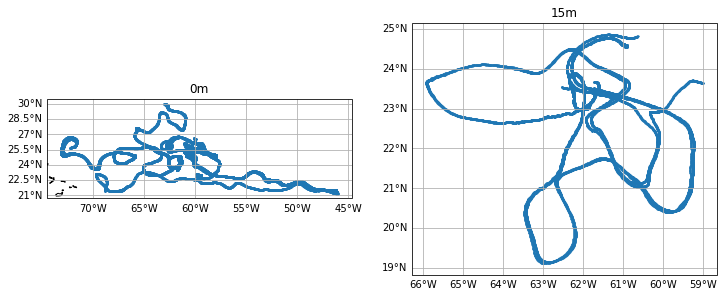

In [6]:
plt.figure(figsize=(12,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.scatter(ds_00['lon'], ds_00['lat'], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([6, 11])
# ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.scatter(ds_15['lon'], ds_15['lat'], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([6, 11])
# ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)



/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

Text(0.5, 1.0, '15m')

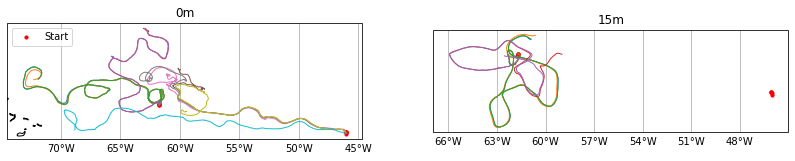

In [7]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'
# ax1.set_xlim([6.5, 11])
# ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
ax1.legend(loc=2)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([6.5, 11])
# ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)



# Plotting just loaction d1 0m:

/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


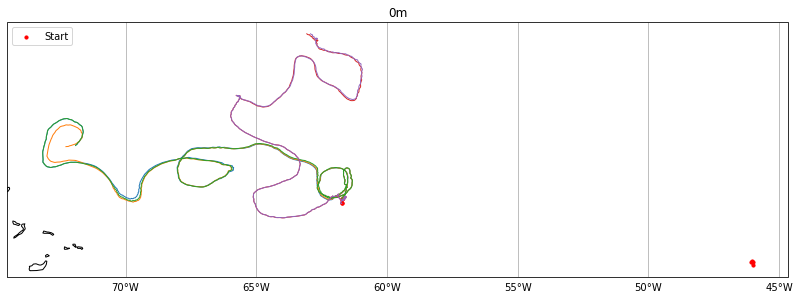

In [9]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_00['lon'][0:5].T, ds_00['lat'][0:5].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'
# ax1.set_xlim([6.5, 11])
# ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
ax1.legend(loc=2)



In [10]:
ds_00.launch_id[0:5]

<xarray.DataArray 'launch_id' (traj: 5)>
array([2591504., 2593999., 2594008., 4101647., 4101642.], dtype=float32)
Dimensions without coordinates: traj
Attributes:
    long_name:      
    standard_name:  launch_id
    units:          unknown

In [11]:
ds_00.time[0:5, 0:5]

<xarray.DataArray 'time' (traj: 5, obs: 5)>
array([['2018-03-12T07:00:00.000000000', '2018-03-12T08:00:00.000000000',
        '2018-03-12T09:00:00.000000000', '2018-03-12T10:00:00.000000000',
        '2018-03-12T11:00:00.000000000'],
       ['2018-03-12T07:01:00.000000000', '2018-03-12T08:00:00.000000000',
        '2018-03-12T09:00:00.000000000', '2018-03-12T10:00:00.000000000',
        '2018-03-12T11:00:00.000000000'],
       ['2018-03-12T07:00:00.000000000', '2018-03-12T08:00:00.000000000',
        '2018-03-12T09:00:00.000000000', '2018-03-12T10:00:00.000000000',
        '2018-03-12T11:00:00.000000000'],
       ['2018-03-11T12:00:00.000000000', '2018-03-11T13:00:00.000000000',
        '2018-03-11T14:00:00.000000000', '2018-03-11T15:00:00.000000000',
        '2018-03-11T16:00:00.000000000'],
       ['2018-03-11T12:00:00.000000000', '2018-03-11T13:00:00.000000000',
        '2018-03-11T14:00:00.000000000', '2018-03-11T15:00:00.000000000',
        '2018-03-11T16:00:00.000000000']], dtype='datetime64[ns]')
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  time
    axis:           T

# --> lauched type-1 d1 at the same time!

In [12]:
ds_00.time[5::, 5::]

<xarray.DataArray 'time' (traj: 5, obs: 4317)>
array([['2018-03-17T01:00:00.000000000', '2018-03-17T02:00:00.000000000',
        '2018-03-17T03:00:00.000000000', ..., '2018-09-12T19:00:00.000000000',
        '2018-09-12T19:18:00.000000000',                           'NaT'],
       ['2018-03-17T01:00:00.000000000', '2018-03-17T02:00:00.000000000',
        '2018-03-17T03:00:00.000000000', ..., '2018-09-12T19:00:00.000000000',
        '2018-09-12T19:14:00.000000000',                           'NaT'],
       ['2018-03-17T01:00:00.000000000', '2018-03-17T02:00:00.000000000',
        '2018-03-17T03:00:00.000000000', ..., '2018-09-12T19:00:00.000000000',
        '2018-09-12T19:18:00.000000000',                           'NaT'],
       ['2018-03-16T16:00:00.000000000', '2018-03-16T17:00:00.000000000',
        '2018-03-16T18:00:00.000000000', ..., '2018-09-12T10:00:00.000000000',
        '2018-09-12T11:00:00.000000000', '2018-09-12T11:10:00.000000000'],
       ['2018-03-23T15:00:00.000000000', '2018-03-23T16:00:00.000000000',
        '2018-03-23T17:00:00.000000000', ..., '2018-09-19T09:00:00.000000000',
        '2018-09-19T10:00:00.000000000',                           'NaT']],
      dtype='datetime64[ns]')
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  time
    axis:           T

# --> AT LOCATION D2: ALSO LAUNCHED AT SAME TIME!

/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

Text(0.5, 1.0, '15m')

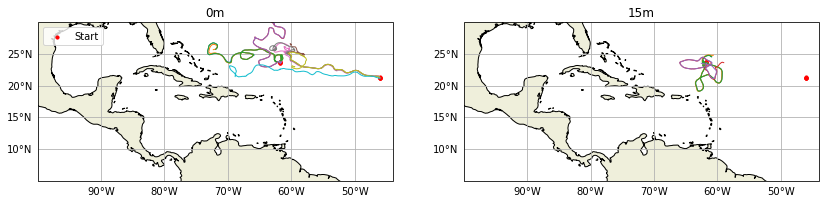

In [22]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'
ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
ax1.legend(loc=2)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
pp = ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)



# Adding legend:

In [17]:
str(ds_15.launch_id.data)

'[2591504. 2593999. 2594008. 4101647. 4101642. 2588728. 2590462. 2592045.\n 4101644. 4101643.]'

/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

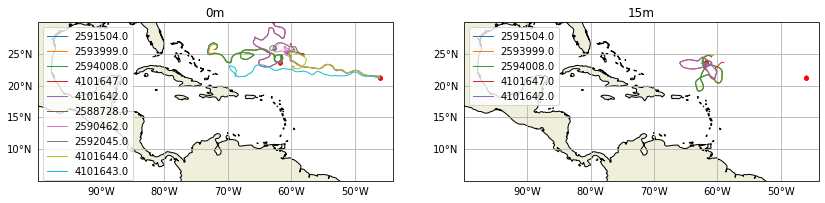

In [31]:
fig = plt.figure(figsize=(14,5)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
pp = ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'
ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
# ax1.legend(loc=2)
plt.legend(iter(pp), ds_00.launch_id.data)#('foo', 'bar', 'baz'))

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
pp = ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)
# ax1.legend(loc=2)
ax1.legend(iter(pp), ds_15.launch_id.data)#('foo', 'bar', 'baz'))



/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

Text(0.5, 1.0, '15m')

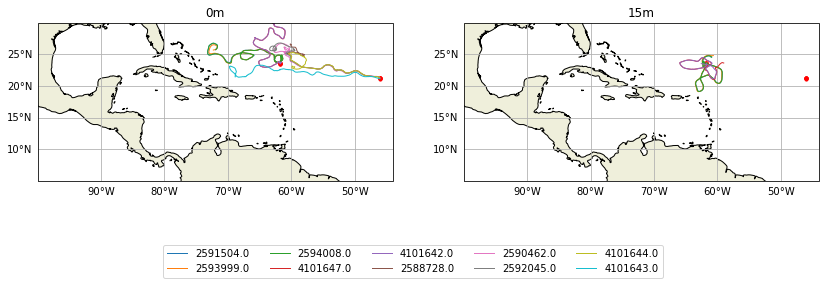

In [30]:
fig = plt.figure(figsize=(14,5)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
pp = ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'
ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
# ax1.legend(loc=2)
# plt.legend(iter(pp), ds_00.launch_id.data)#('foo', 'bar', 'baz'))
plt.legend(iter(pp), ds_00.launch_id.data, bbox_to_anchor=(.75,0), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=5)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
pp = ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([-100., -44.])
ax1.set_ylim([5., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)
# ax1.legend(loc=2)
# ax1.legend(iter(pp), ds_15.launch_id.data)#('foo', 'bar', 'baz'))



In [ ]:
l5 = plt.legend(bbox_to_anchor=(1,0), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

# --> res = " ".join([str(i) for i in test_list]) --> to plot it as strings not floats

# Zoom:

/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

Text(0.5, 1.0, '15m')

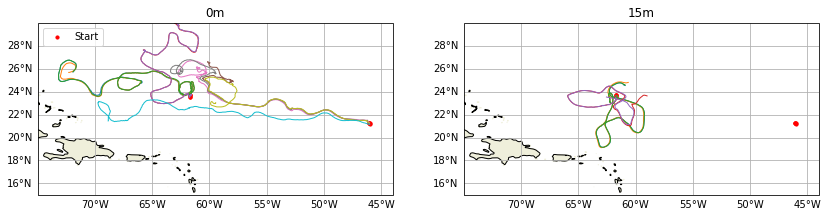

In [27]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'
ax1.set_xlim([-75., -44.])
ax1.set_ylim([15., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
ax1.legend(loc=2)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([-75., -44.])
ax1.set_ylim([15., 30.])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)





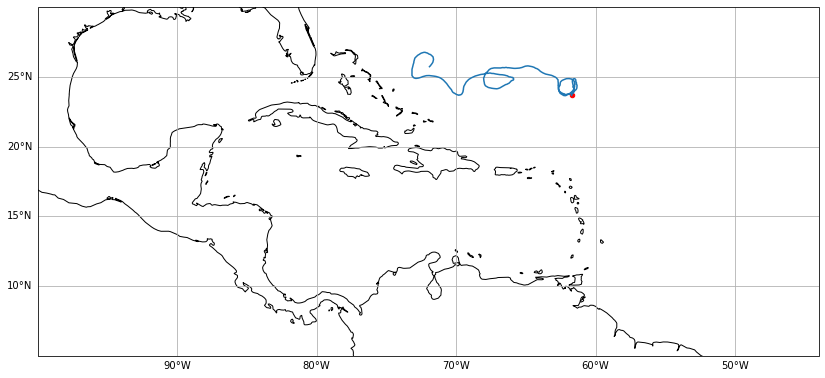

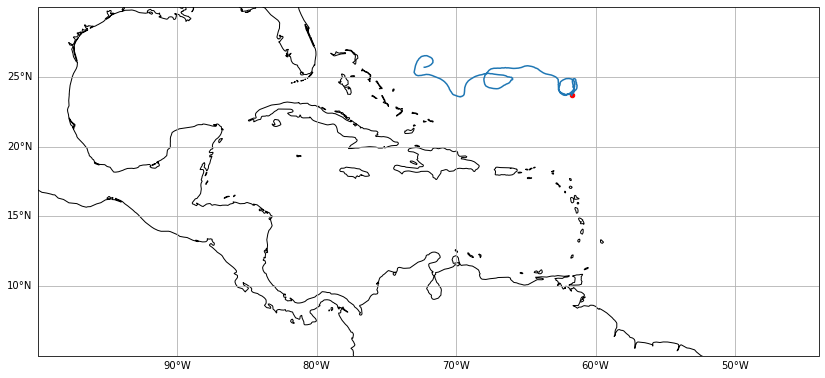

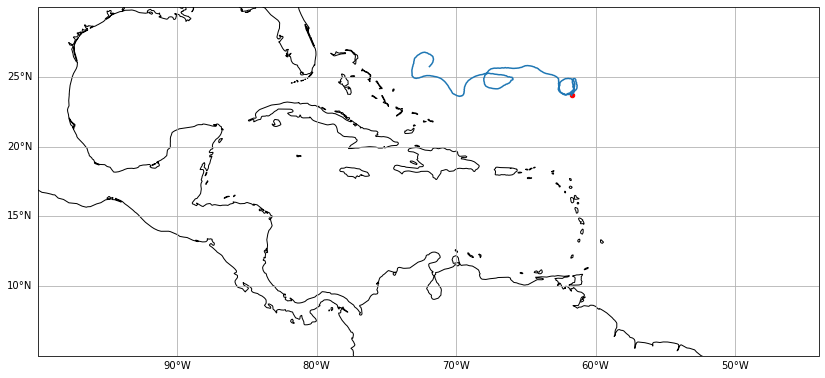

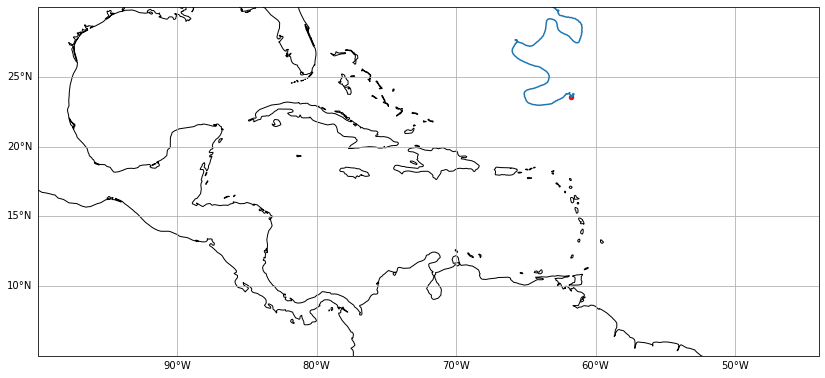

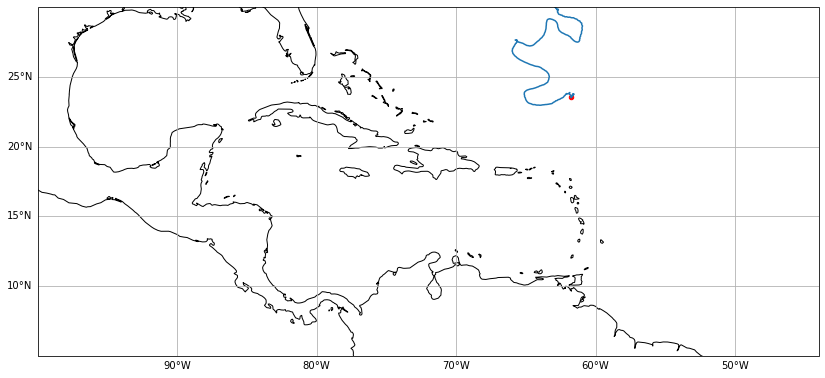

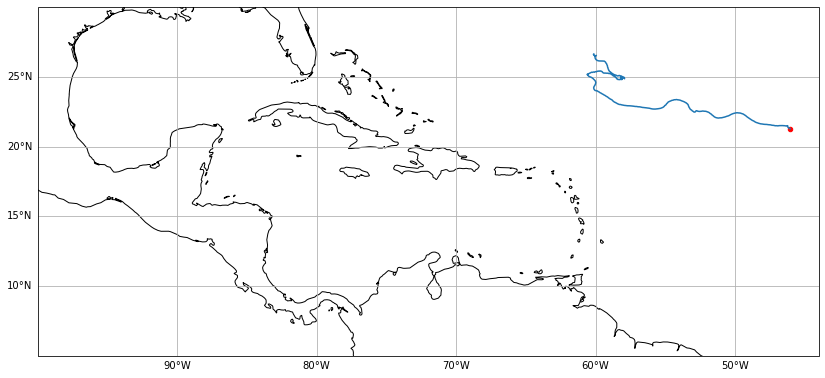

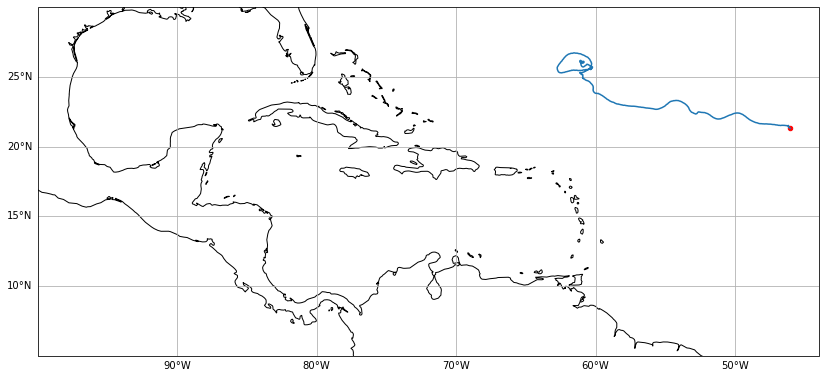

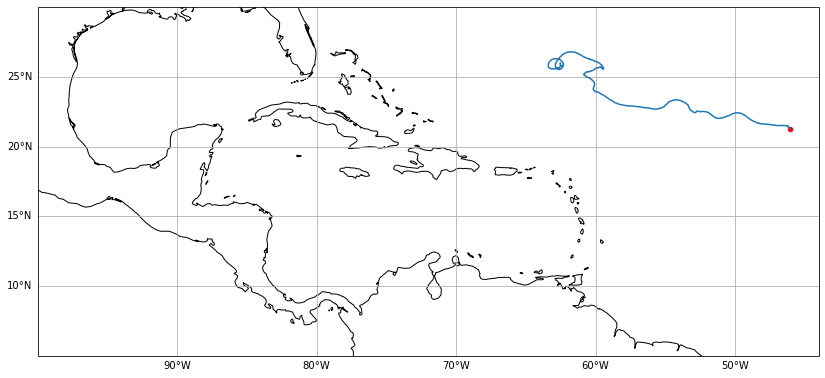

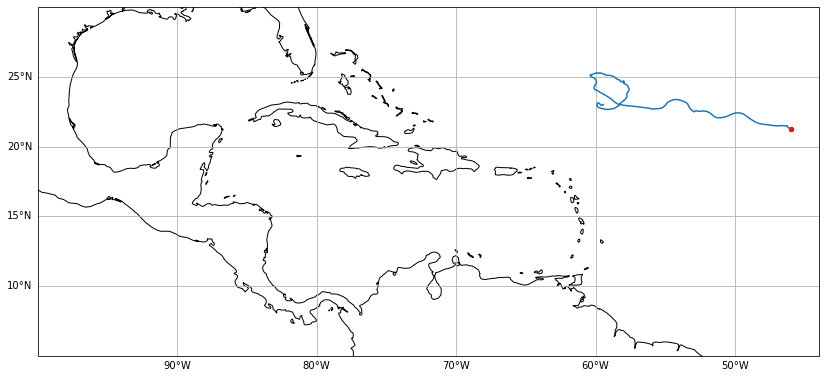

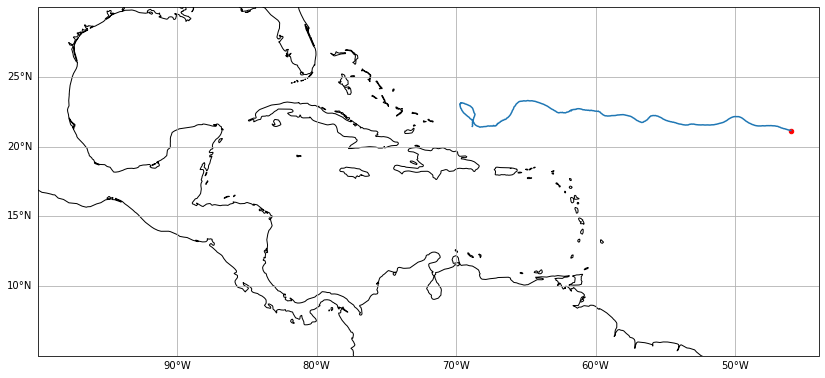

In [9]:
for ii in range(0, ds_00.lat.shape[0]):
    plt.figure(figsize=(14,14)) #(17,5)

    ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
    ax1.coastlines(resolution='50m')
    #ax1.add_feature(cartopy.feature.LAND, facecolor='black')
    ax1.plot(ds_00['lon'][ii,:], ds_00['lat'][ii,:], transform=ccrs.PlateCarree()) #marker='o'
    ax1.scatter(ds_00['lon'][ii,0], ds_00['lat'][ii,0], c='r', s=20, transform=ccrs.PlateCarree()) #marker='o'
    ax1.set_xlim([-100., -44.])
    ax1.set_ylim([5., 30.])
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

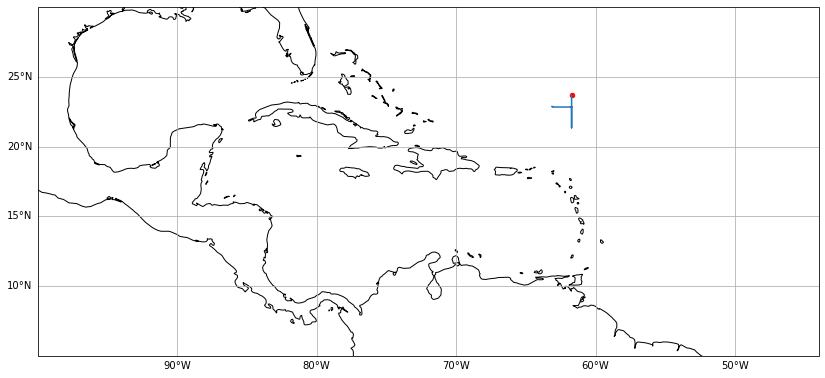

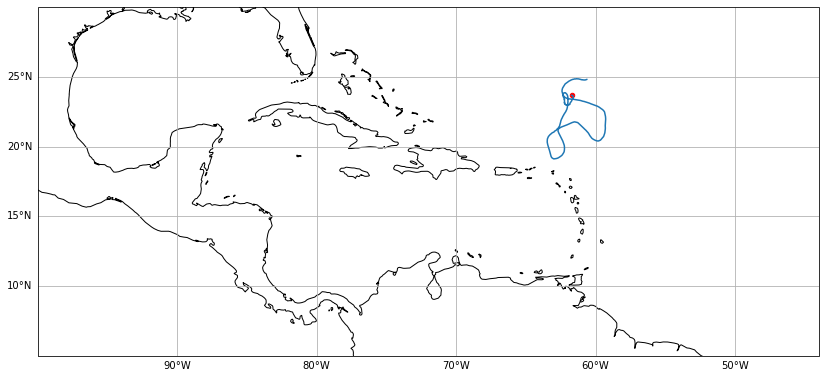

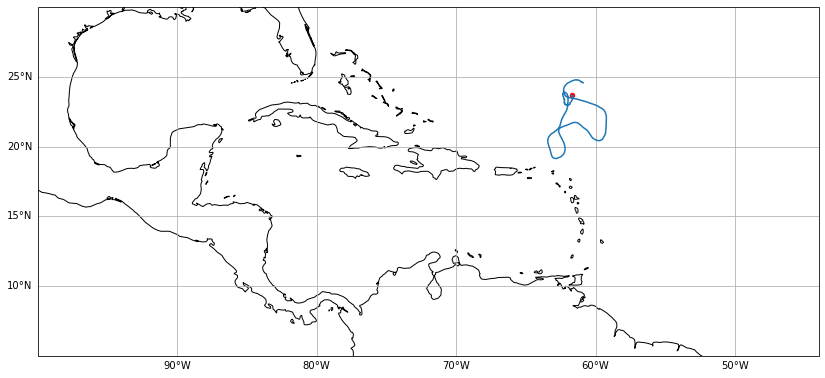

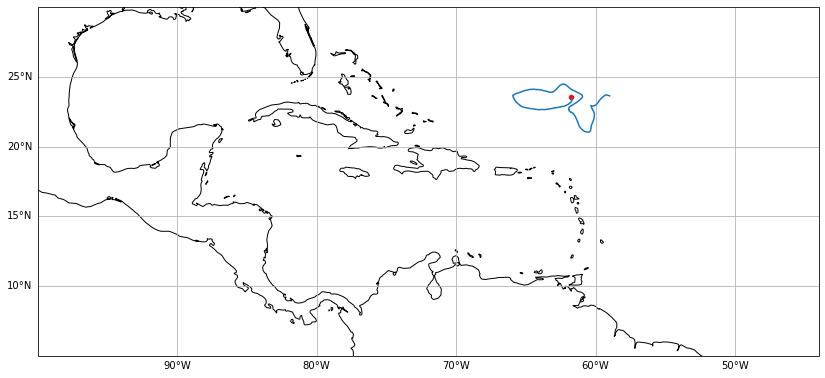

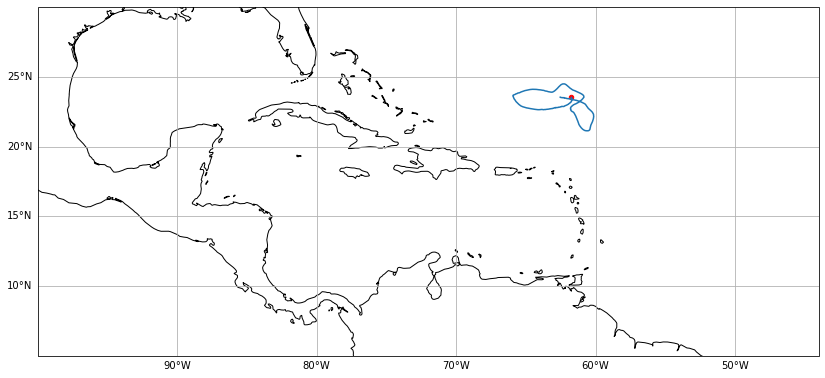

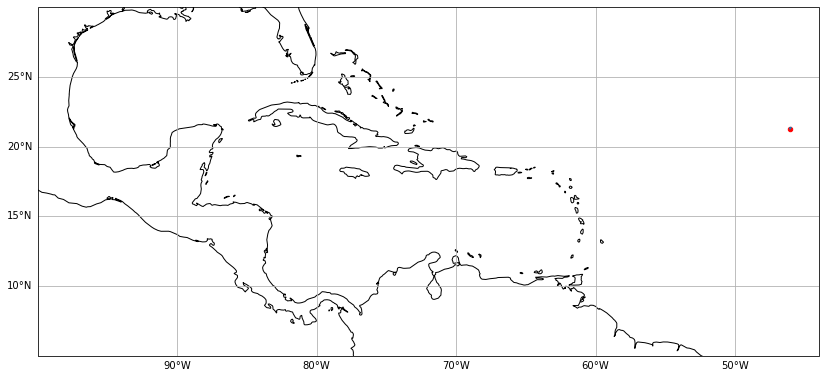

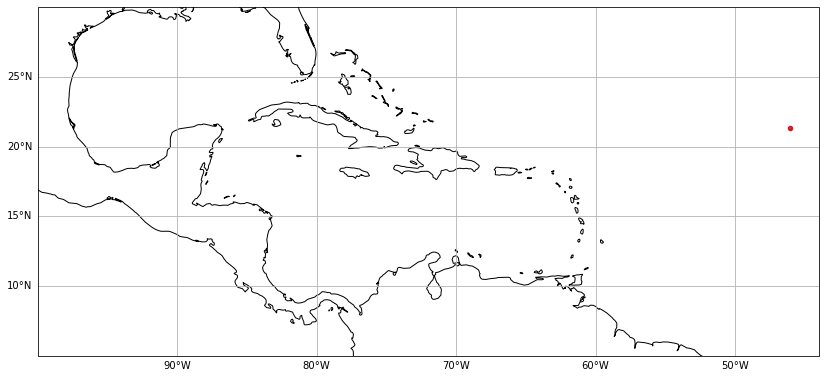

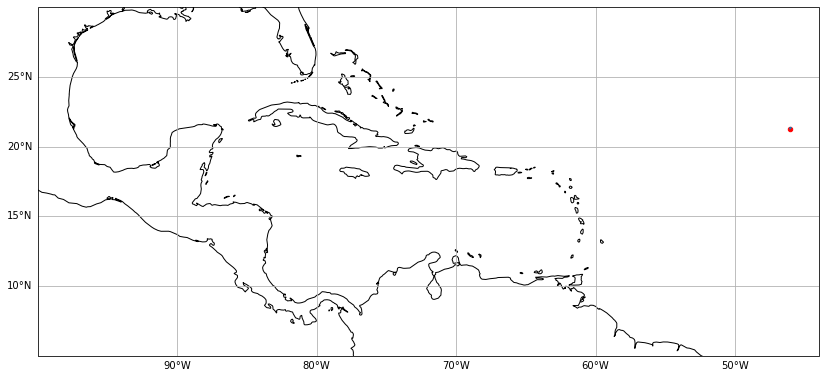

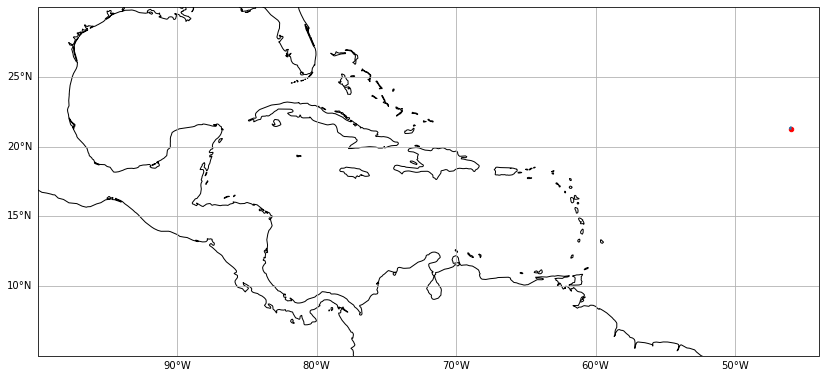

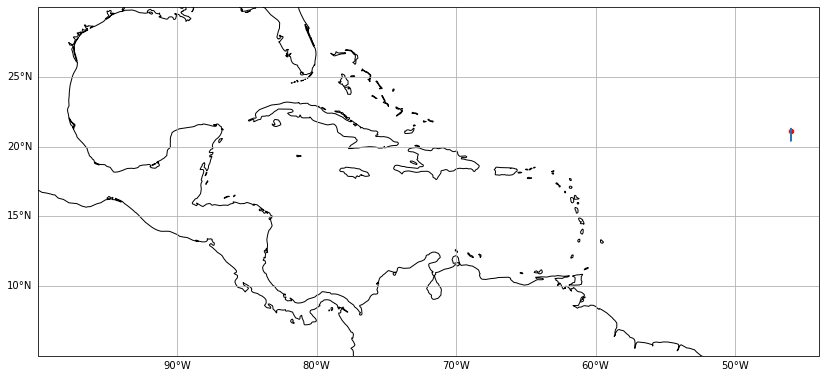

In [16]:
for ii in range(0, ds_00.lat.shape[0]):
    plt.figure(figsize=(14,14)) #(17,5)

    ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
    ax1.coastlines(resolution='50m')
    #ax1.add_feature(cartopy.feature.LAND, facecolor='black')
    ax1.plot(ds_15['lon'][ii,:], ds_15['lat'][ii,:], transform=ccrs.PlateCarree()) #marker='o'
    ax1.scatter(ds_15['lon'][ii,0], ds_15['lat'][ii,0], c='r', s=20, transform=ccrs.PlateCarree()) #marker='o'
    ax1.set_xlim([-100., -44.])
    ax1.set_ylim([5., 30.])
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

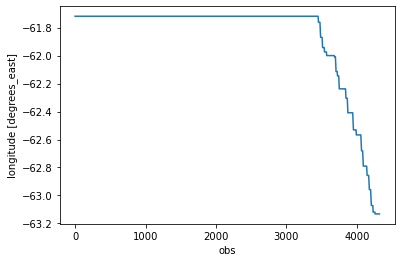

In [19]:
ds_15['lon'][0,:].plot()

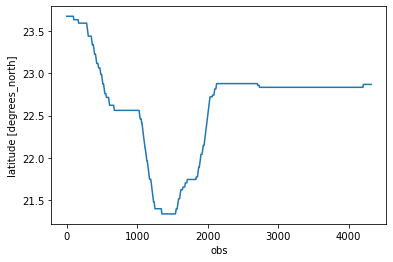

In [20]:
ds_15['lat'][0,:].plot()

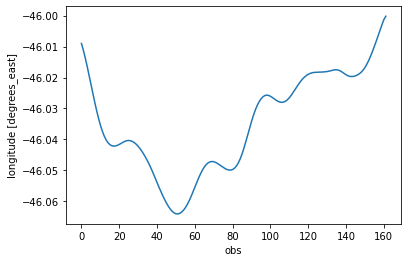

In [22]:
ds_15['lon'][-2,:].plot()

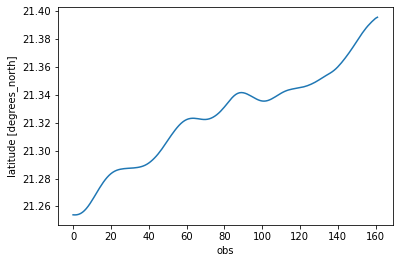

In [23]:
ds_15['lat'][-2,:].plot()

# --> compared to trajectory 0, here traj looks normal, less steppy!!!

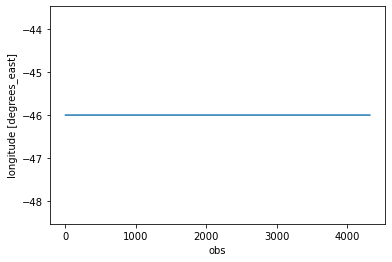

In [24]:
ds_15['lon'][-1,:].plot()

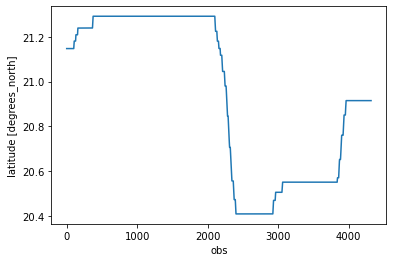

In [25]:
ds_15['lat'][-1,:].plot()

# --> weird too!

In [21]:
ds_15.time[0,:]

<xarray.DataArray 'time' (obs: 4322)>
array(['2018-03-12T07:00:00.000000000', '2018-03-12T08:00:00.000000000',
       '2018-03-12T09:00:00.000000000', ..., '2018-09-08T06:00:00.000000000',
       '2018-09-08T07:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')
Dimensions without coordinates: obs
Attributes:
    long_name:      
    standard_name:  time
    axis:           T

# Plotting per position:

# Loading miron:

In [3]:
!ls /Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d3

type-0_id-4101645.csv type-2_id-2591485.csv type-4_id-2591361.csv
type-1_id-2588898.csv type-2_id-2592052.csv type-4_id-2591992.csv
type-1_id-2591486.csv type-2_id-2592119.csv type-6_id-4101641.csv
type-1_id-2591972.csv type-3_id-2587112.csv
type-2_id-2591011.csv type-3_id-2590102.csv


In [8]:
filedir_Miron = '/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/'

In [9]:
drifters_list_d1 = [filedir_Miron + 'd1/' + 'type-1_id-2591504.csv',
                    filedir_Miron + 'd1/' + 'type-1_id-2593999.csv',
                    filedir_Miron + 'd1/' + 'type-1_id-2594008.csv',
                    filedir_Miron + 'd1/' + 'type-0_id-4101647.csv', 
                    filedir_Miron + 'd1/' + 'type-6_id-4101642.csv']

In [10]:
drifters_list_d2 = [filedir_Miron + 'd2/' + 'type-1_id-2588728.csv',
                    filedir_Miron + 'd2/' + 'type-1_id-2590462.csv',
                    filedir_Miron + 'd2/' + 'type-1_id-2592045.csv',
                    filedir_Miron + 'd2/' + 'type-0_id-4101644.csv',
                    filedir_Miron + 'd2/' + 'type-6_id-4101643.csv']

In [11]:
import cartopy
import cartopy.feature as cpf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from collections import namedtuple
from shapely.geometry.polygon import LinearRing

In [12]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

region = Region(
    region_name="all_region",
    lonmin = -99.,
    lonmax = -46.,
    latmin = 5.0,
    latmax = 30.,
)

# d1:

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2594008.csv


/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-0_id-4101647.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-6_id-4101642.csv


/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

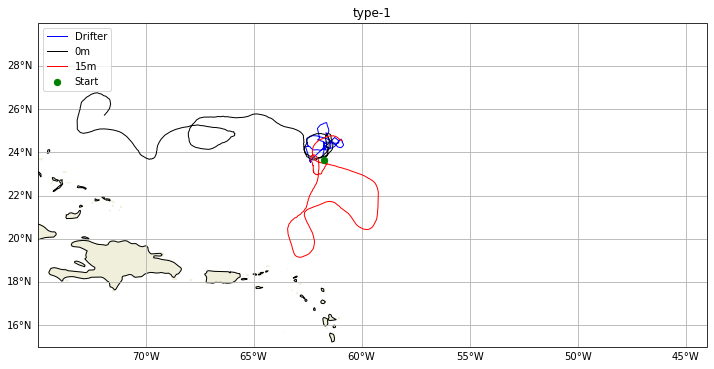

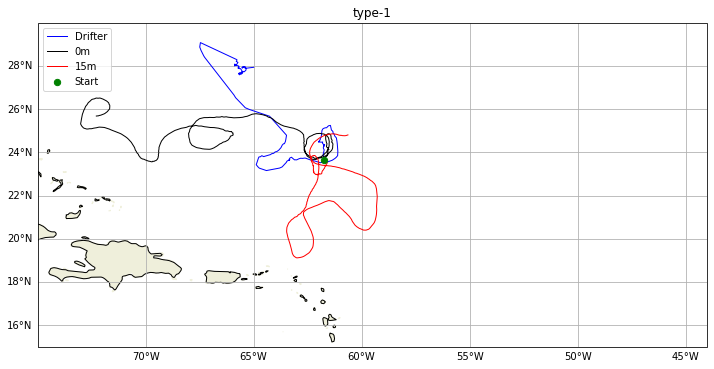

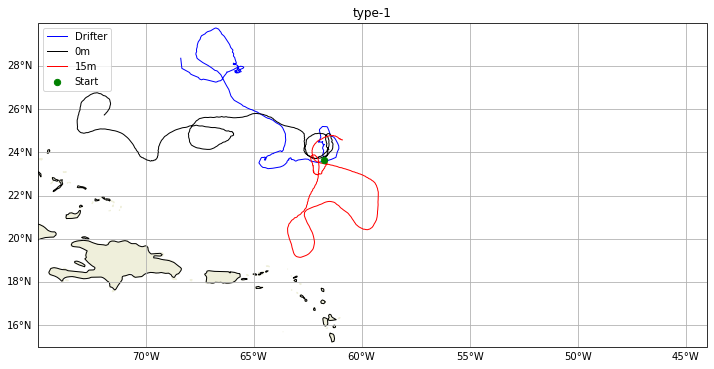

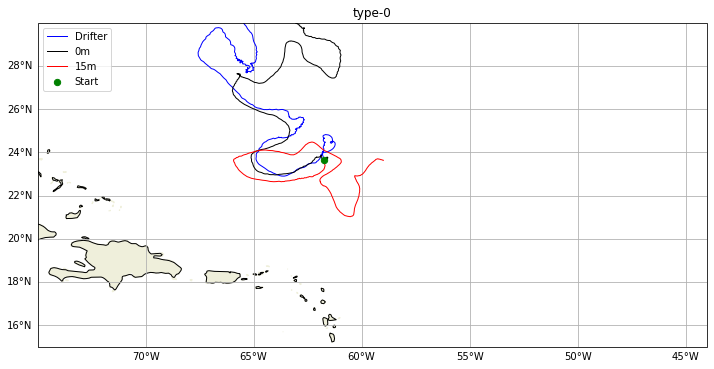

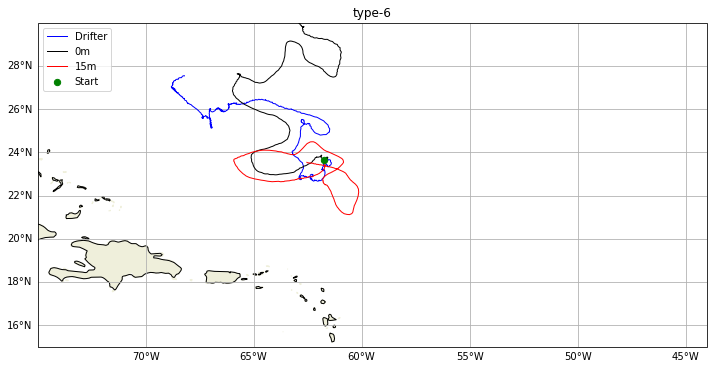

In [13]:
#loop on type
ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        # Plot:
        plt.figure(figsize=(12,8)) #(17,5)

        ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-75., -44.])
        ax1.set_ylim([15., 30.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_right = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=1, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=1, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        ax1.legend(loc=2)
        ii=ii+1

# Zoom in location d1:

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2594008.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-0_id-4101647.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-6_id-4101642.csv


/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

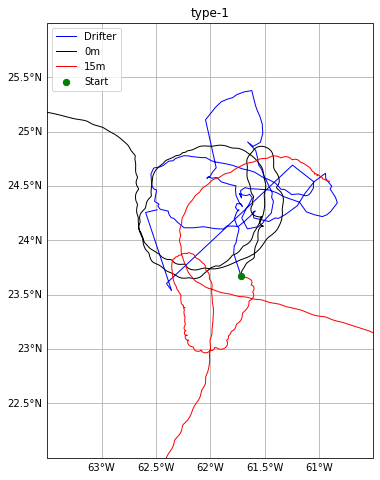

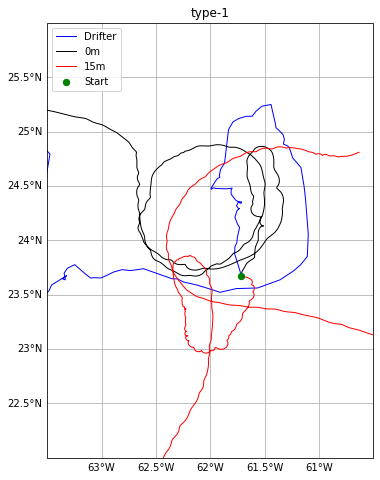

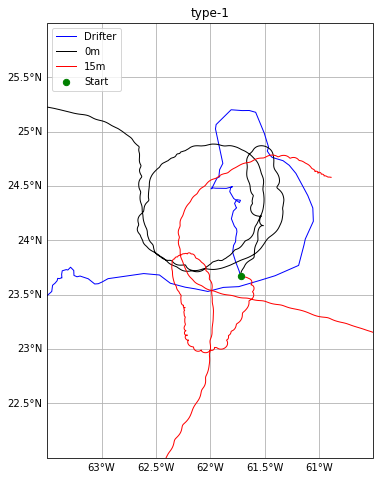

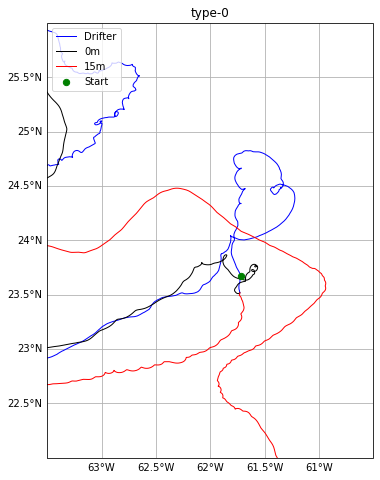

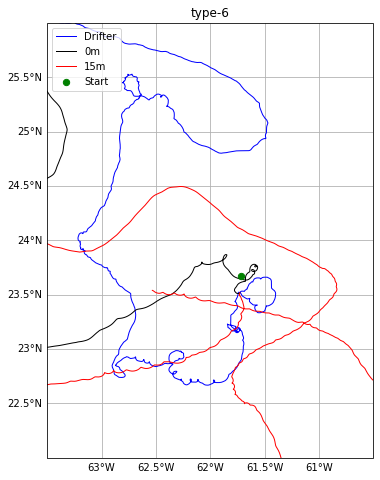

In [16]:
#loop on type
ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        # Plot:
        plt.figure(figsize=(12,8)) #(17,5)

        ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-63.5, -60.5])
        ax1.set_ylim([22., 26.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_right = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=1, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=1, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        ax1.legend(loc=2)
        ii=ii+1

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2594008.csv


NameError: name 'dgsdg' is not defined

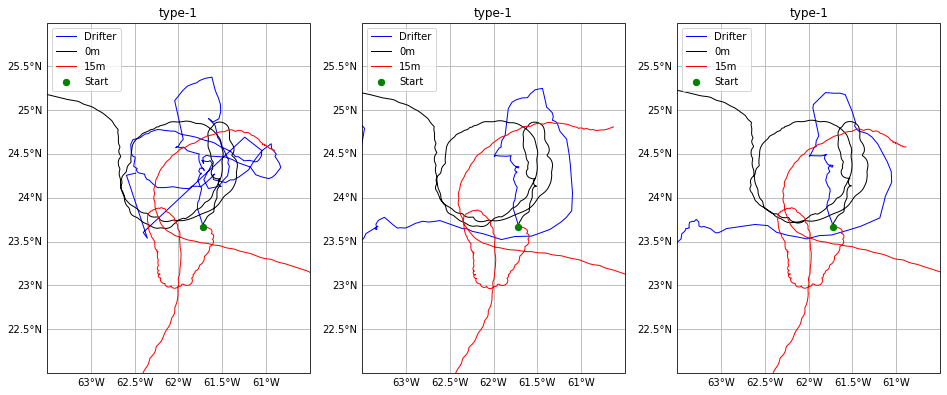

In [21]:
#loop on type

# Plot:
plt.figure(figsize=(16,8)) #(17,5)

ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        ax1 = plt.subplot(1,3,ii+1, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-63.5, -60.5])
        ax1.set_ylim([22., 26.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=1, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=1, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        ax1.legend(loc=2)
        ii=ii+1
        if ii==3:
            dgsdg

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2594008.csv


<ipython-input-23-c62e936ba5d3>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
<ipython-input-23-c62e936ba5d3>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111, projection=ccrs.PlateCarree())


NameError: name 'dgsdg' is not defined

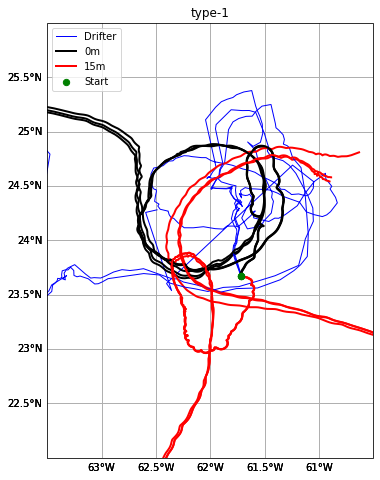

In [23]:
#loop on type

# Plot:
plt.figure(figsize=(6,8)) #(17,5)

ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-63.5, -60.5])
        ax1.set_ylim([22., 26.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=2, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=2, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        if ii == 0:
            ax1.legend(loc=2)
        ii=ii+1
        if ii==3:
            dgsdg

In [ ]:
#loop on type

# Plot:
plt.figure(figsize=(6,8)) #(17,5)

ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-63.5, -60.5])
        ax1.set_ylim([22., 26.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=2, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=2, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        if ii == 0:
            ax1.legend(loc=2)
        ii=ii+1
        if ii==3:
            dgsdg

In [34]:
drifter.split('/')[-1].split('_')[0]

'type-6'

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2594008.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-0_id-4101647.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-6_id-4101642.csv


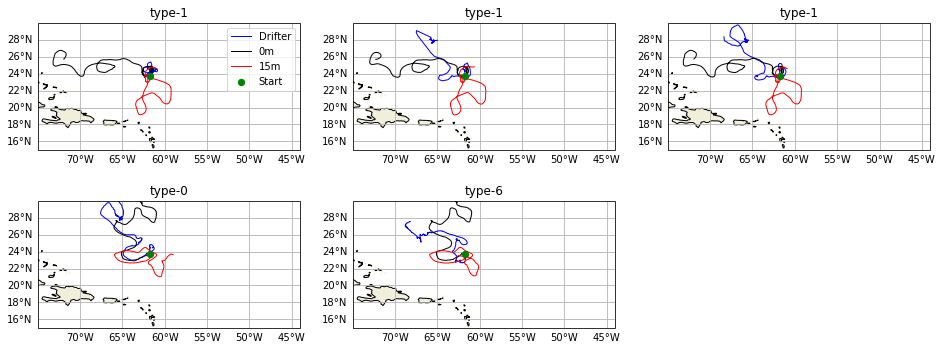

In [35]:
#loop on type

plt.figure(figsize=(16,6)) #(17,5)
#axs = [ax1, ax2, ax3, ax4, ax5]

    
ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        # Plot:

        ax1 = plt.subplot(2,3,ii+1, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-75., -44.])
        ax1.set_ylim([15., 30.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=1, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=1, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        if ii == 0:
            ax1.legend(loc=1)
        ii=ii+1

# Location d2:

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d2/type-1_id-2588728.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d2/type-1_id-2590462.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d2/type-1_id-2592045.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d2/type-0_id-4101644.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d2/type-6_id-4101643.csv


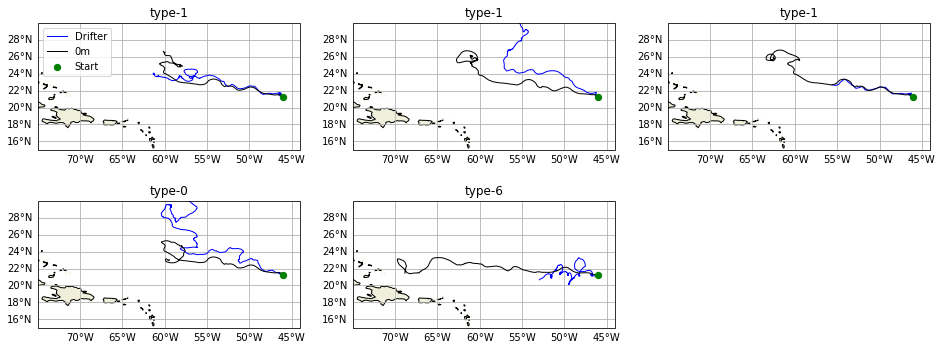

In [37]:
#loop on type

plt.figure(figsize=(16,6)) #(17,5)
#axs = [ax1, ax2, ax3, ax4, ax5]

    
ii=0
for drifter in drifters_list_d2:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        # Plot:

        ax1 = plt.subplot(2,3,ii+1, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-75., -44.])
        ax1.set_ylim([15., 30.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii+5,:].T, ds_00['lat'][ii+5,:].T, 'k-', linewidth=1, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        #ax1.plot(ds_15['lon'][ii+5,:].T, ds_15['lat'][ii+5,:].T, 'r-', linewidth=1, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][5,0], ds_00['lat'][5,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        if ii == 0:
            ax1.legend(loc=2)
        ii=ii+1

# --> diags of distance to the drifter of clement data and cmems data!

# CMEMS:

In [47]:


ds_00_CMEMS = xr.open_dataset("CMEMS-TATL_sargassum_drift_1H_00m_drifters_180days-v1.0-fv1.0.nc")
#ds_15 = xr.open_dataset("20180312065959-WOC-L4-CURlag-TATL_sargassum_drift_1H_15m_drifters_180days-v1.0-fv1.0.nc")

ds_15_CMEMS = xr.open_dataset("CMEMS-TATL_sargassum_drift_1H_15m_drifters_180days-v1.0-fv1.0.nc")

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2594008.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-0_id-4101647.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-6_id-4101642.csv


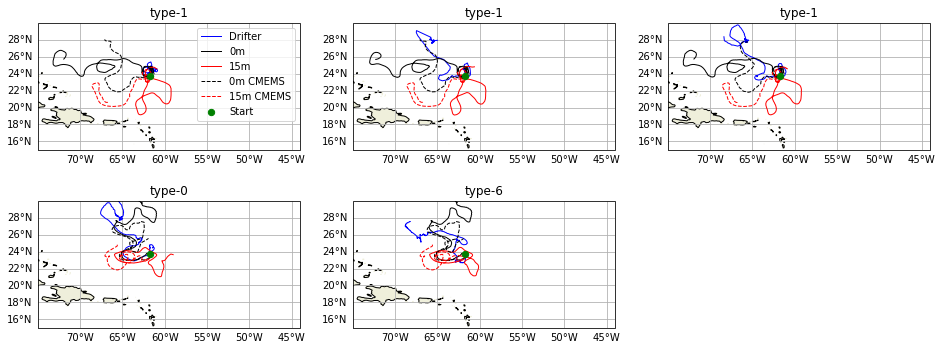

In [48]:
#loop on type

plt.figure(figsize=(16,6)) #(17,5)
#axs = [ax1, ax2, ax3, ax4, ax5]

    
ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        # Plot:

        ax1 = plt.subplot(2,3,ii+1, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-75., -44.])
        ax1.set_ylim([15., 30.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=1, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=1, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.plot(ds_00_CMEMS['lon'][ii,:].T, ds_00_CMEMS['lat'][ii,:].T, 'k--', linewidth=1, label='0m CMEMS', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15_CMEMS['lon'][ii,:].T, ds_15_CMEMS['lat'][ii,:].T, 'r--', linewidth=1, label='15m CMEMS', transform=ccrs.PlateCarree()) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        if ii == 0:
            ax1.legend(loc=1)
        ii=ii+1

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2594008.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-0_id-4101647.csv


/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to t

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-6_id-4101642.csv


/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/envs/py3_parcels_DIAG/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


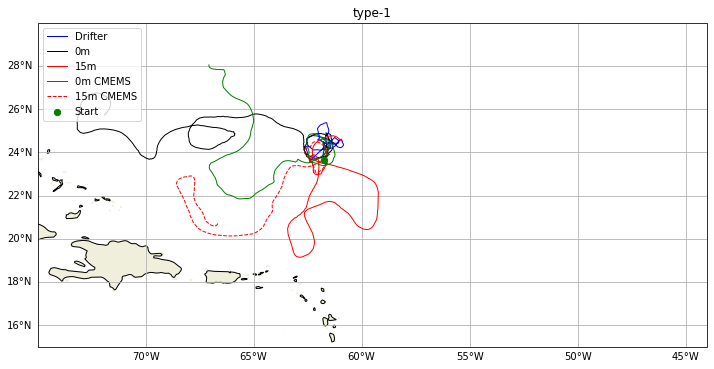

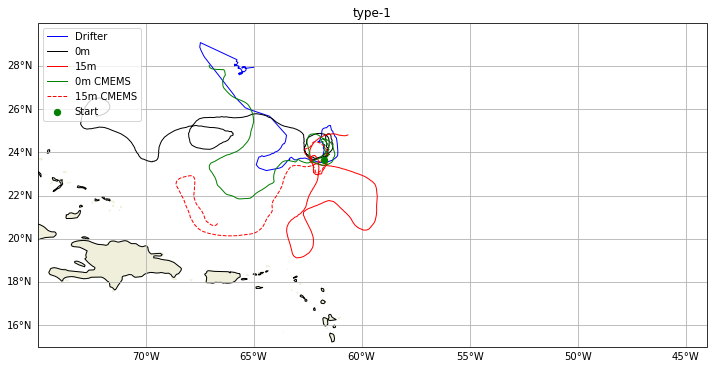

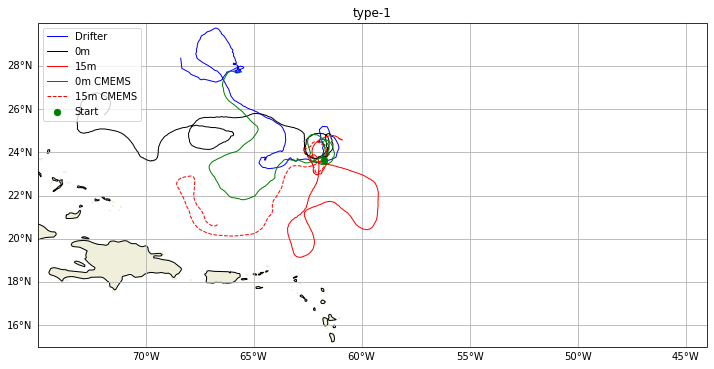

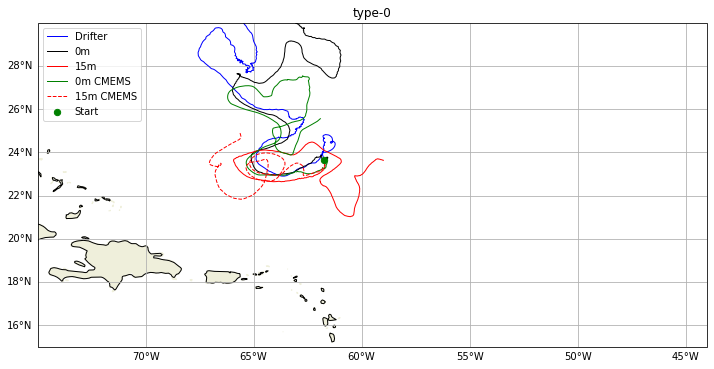

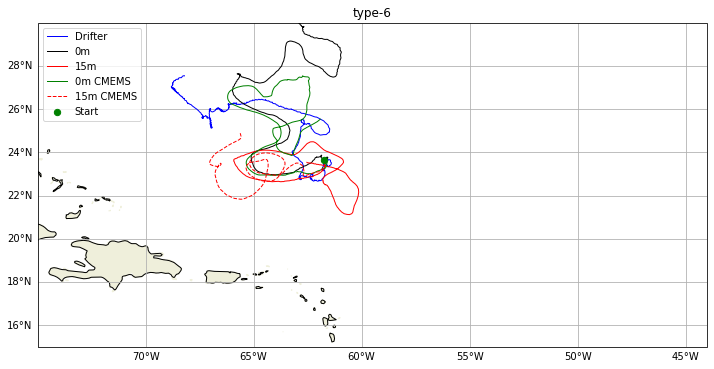

In [49]:
#loop on type
ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        # Plot:
        plt.figure(figsize=(12,8)) #(17,5)

        ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-75., -44.])
        ax1.set_ylim([15., 30.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_right = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=1, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=1, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.plot(ds_00_CMEMS['lon'][ii,:].T, ds_00_CMEMS['lat'][ii,:].T, 'g-', linewidth=1, label='0m CMEMS', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15_CMEMS['lon'][ii,:].T, ds_15_CMEMS['lat'][ii,:].T, 'r--', linewidth=1, label='15m CMEMS', transform=ccrs.PlateCarree()) #marker='o'
        
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        ax1.legend(loc=2)
        ii=ii+1

/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-1_id-2594008.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-0_id-4101647.csv
/Users/Gomez023/Postdoc/data/WOC/Sargassum/data_Miron/Miron_etal_2020/data/d1/type-6_id-4101642.csv


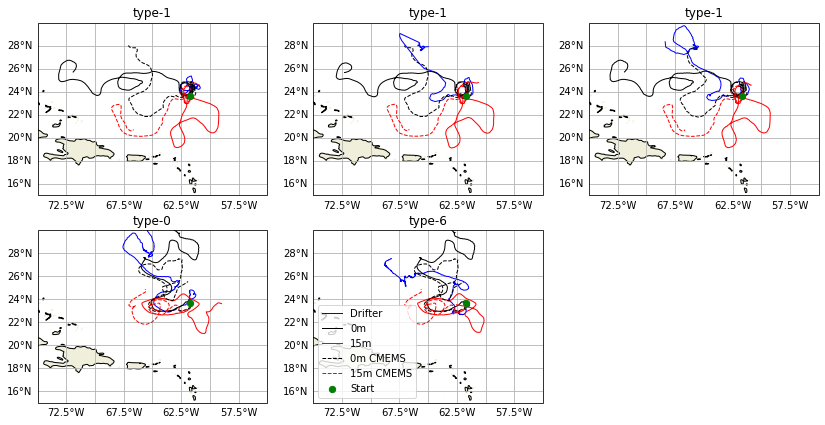

In [53]:
#loop on type

plt.figure(figsize=(14,7)) #(17,5)
#axs = [ax1, ax2, ax3, ax4, ax5]

    
ii=0
for drifter in drifters_list_d1:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        df = df[(df["longitude"] > region.lonmin) & (df["longitude"] < region.lonmax) & (df["latitude"] > region.latmin) & (df["latitude"] < region.latmax)]
                
        # Plot:

        ax1 = plt.subplot(2,3,ii+1, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])

        ax1.set_xlim([-75., -55.])
        ax1.set_ylim([15., 30.])
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        #gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        ax1.plot(df['longitude'],df['latitude'], 'b-', linewidth=1, label='Drifter', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_00['lon'][ii,:].T, ds_00['lat'][ii,:].T, 'k-', linewidth=1, label='0m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15['lon'][ii,:].T, ds_15['lat'][ii,:].T, 'r-', linewidth=1, label='15m', transform=ccrs.PlateCarree()) #marker='o'
        ax1.scatter(ds_00['lon'][0,0], ds_00['lat'][0,0], c='g', s=40, transform=ccrs.PlateCarree(), label='Start', zorder=200) #marker='o'
        
        ax1.plot(ds_00_CMEMS['lon'][ii,:].T, ds_00_CMEMS['lat'][ii,:].T, 'k--', linewidth=1, label='0m CMEMS', transform=ccrs.PlateCarree()) #marker='o'
        ax1.plot(ds_15_CMEMS['lon'][ii,:].T, ds_15_CMEMS['lat'][ii,:].T, 'r--', linewidth=1, label='15m CMEMS', transform=ccrs.PlateCarree()) #marker='o'
        
        ax1.set_title(drifter.split('/')[-1].split('_')[0], size=12)
        if ii == 4:
            ax1.legend(loc=3)
        ii=ii+1